In [80]:
import pandas as pd
#dataset source: https://github.com/adrianstando/imbalanced-benchmarking-set/blob/main/datasets/SpeedDating.csv
data = pd.read_csv('SpeedDating.csv')

In [81]:
variables = data.drop([data.columns[0], 'TARGET'], axis=1)
target = data['TARGET']

variables

,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,intelligence_o,funny_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,interests_correlate,like
0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,0.14,7.0
1,60.0,0.0,0.0,40.0,0.0,0.0,7.0,10.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,0.54,7.0
2,30.0,5.0,15.0,40.0,5.0,5.0,7.0,9.0,8.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,0.61,7.0
3,30.0,10.0,20.0,10.0,10.0,20.0,8.0,9.0,6.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,0.21,6.0
4,50.0,0.0,30.0,10.0,0.0,10.0,7.0,8.0,8.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,0.25,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,15.0,15.0,20.0,25.0,10.0,15.0,2.0,6.0,2.0,1.0,25.0,10.0,20.0,20.0,10.0,15.0,0.35,5.0
1044,15.0,15.0,25.0,25.0,15.0,5.0,4.0,8.0,3.0,2.0,25.0,10.0,20.0,20.0,10.0,15.0,0.45,5.0
1045,20.0,20.0,20.0,20.0,10.0,10.0,5.0,4.0,5.0,3.0,25.0,10.0,20.0,20.0,10.0,15.0,0.13,5.0
1046,15.0,15.0,25.0,25.0,20.0,0.0,4.0,7.0,3.0,0.0,25.0,10.0,20.0,20.0,10.0,15.0,0.54,5.0


In [82]:
target.value_counts()

0    862
1    186
Name: TARGET, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split

v_train, v_test, t_train, t_test = train_test_split(variables, target, random_state=69, test_size=0.2)

def use_model(model):
    model.fit(v_train, t_train)
    
    p_train = model.predict(v_train)
    p_test = model.predict(v_test)
    
    return (p_train, p_test)

data = list(map(use_model, models))

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt
import numpy as np

models = [LogisticRegression(max_iter=1000), GradientBoostingClassifier(), RandomForestClassifier()]
labels = list(map(lambda model: type(model).__name__, models))
metrics = [(accuracy_score, "Accuracy"), (precision_score, "Precision"), (recall_score, "Recall")]

heights = [0.2] * len(labels)
y = np.arange(len(labels))

def plot(metric, name):
    train_values = list(map(lambda model_data: metric(model_data[0], t_train), data))
    test_values = list(map(lambda model_data: metric(model_data[1], t_test), data))
    
    plt.title(name)
    plt.barh(y + 0.1, train_values, label = "Train", height=heights)
    plt.barh(y - 0.1, test_values, label = "Test", height=heights)
    plt.yticks(range(len(labels)), labels)
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

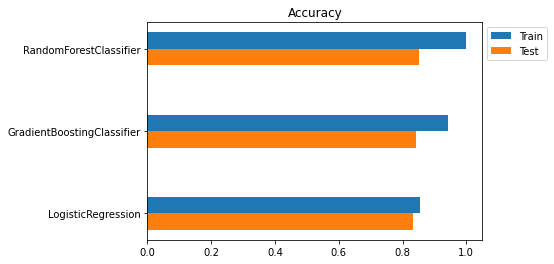

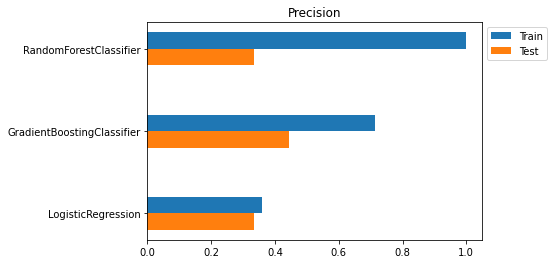

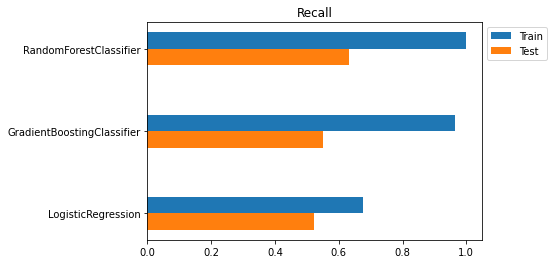

In [89]:
for metric in metrics:
    plot(metric[0], metric[1])